# Hand edit topography on selected sills and straits

In [1]:
import os
import sys
sys.path.insert(0,os.path.abspath('src/'))
from datetime import date

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from topo_edit_util import inspect_topo, create_soc_topo_table

## Get input topography data set

In [3]:
grid = 'tx2_3v2'
topo = 'SRTM15_V2.4'
nsub = 'sub150'
topo_src = 'srtm'
edit = 'edit4'
case = 'SmL1.0_C1.0'
depth_var_in = 'D_interp'
path_root = './'

In [4]:
path_in = path_root 

file_in = 'topo.' + nsub + '.' + grid + '.' + topo_src + '.' + edit + '.' + case + '.nc'
print(path_in+file_in)
dss = xr.open_dataset(path_in+file_in)

depth_var_new = 'depth_new'
dss[depth_var_new] = dss[depth_var_in].copy(deep=True)

./topo.sub150.tx2_3v2.srtm.edit4.SmL1.0_C1.0.nc


In [5]:
dss

<xarray.Dataset>
Dimensions:     (lonh: 540, lath: 480, lonq: 541, latq: 481)
Coordinates:
  * lonh        (lonh) float64 -286.7 -286.0 -285.3 -284.7 ... 71.33 72.0 72.67
  * lath        (lath) float64 -81.56 -81.46 -81.36 -81.26 ... 89.33 89.6 89.86
  * lonq        (lonq) float64 -287.0 -286.3 -285.7 -285.0 ... 71.67 72.33 73.0
  * latq        (latq) float64 -81.61 -81.51 -81.41 -81.31 ... 89.46 89.72 89.91
Data variables: (12/16)
    geolon      (lath, lonh) float64 ...
    geolat      (lath, lonh) float64 ...
    geolonb     (latq, lonq) float64 ...
    geolatb     (latq, lonq) float64 ...
    z           (lath, lonh) float32 ...
    ocn_frac    (lath, lonh) float32 ...
    ...          ...
    D_min       (lath, lonh) float32 ...
    D_max       (lath, lonh) float32 ...
    hand_edits  (lath, lonh) int32 ...
    orig_mask   (lath, lonh) int32 ...
    D_interp    (lath, lonh) float32 ...
    depth_new   (lath, lonh) float32 ...
Attributes:
    Description:             Ocean Topography Statistics on MOM6 Grid
    Creator:                 Frank Bryan (bryan@ucar.edu)
    Created:                 20240216
    Generating Code:         create_model_topo.f90
    Model Grid Version:      tx2_3v2
    Source Topography Data:  /glade/campaign/cgd/oce/datasets/obs/SRTM/SRTM15...
    Edit History:            Hand Edit + Lake Fill 02/16/2024

In [6]:
soc_table = create_soc_topo_table()

## Set up output file

In [7]:
today = date.today()

path_out = path_in
file_out_topo = 'TopoEdit_' + grid + '_' + today.strftime("%m.%d.%Y") + '.nc'
print('topo edit file : ',file_out_topo)

topo edit file :  TopoEdit_tx2_3v2_02.26.2024.nc


In [8]:
iEdit=[]
jEdit=[]
zEdit = []

## Selected Straits

### Denmark Strait

{'lat': 66.0, 'lon': -28.0, 'depth': 600.0, 'width': -1.0}


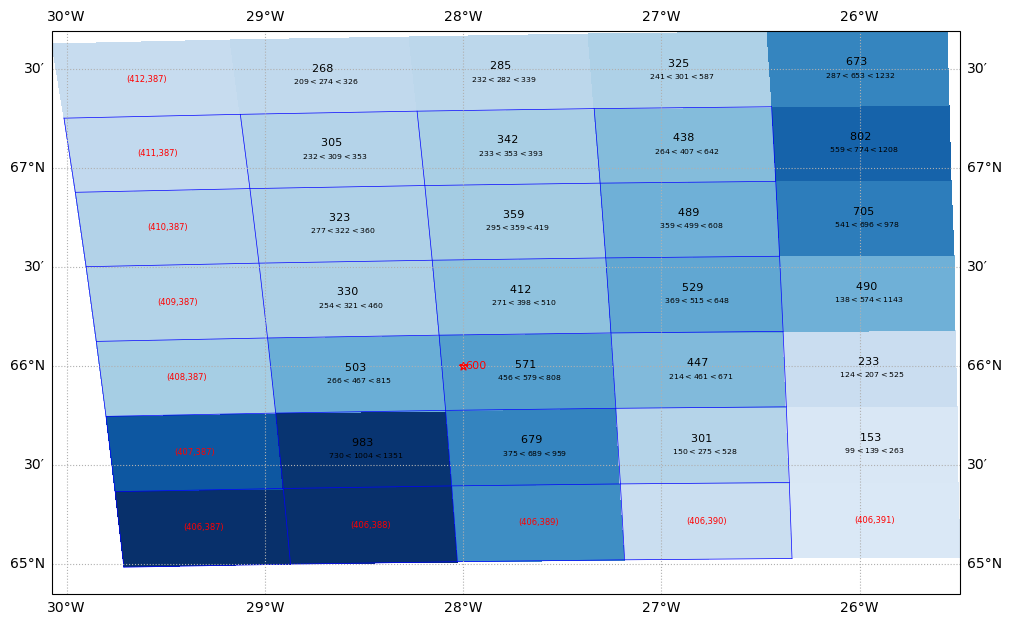

In [9]:
place = 'Denmark St.'
print(soc_table[place])
      
lon_beg = -29
lon_end = -25
lat_beg = 65
lat_end = 68
zmax = 1000.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

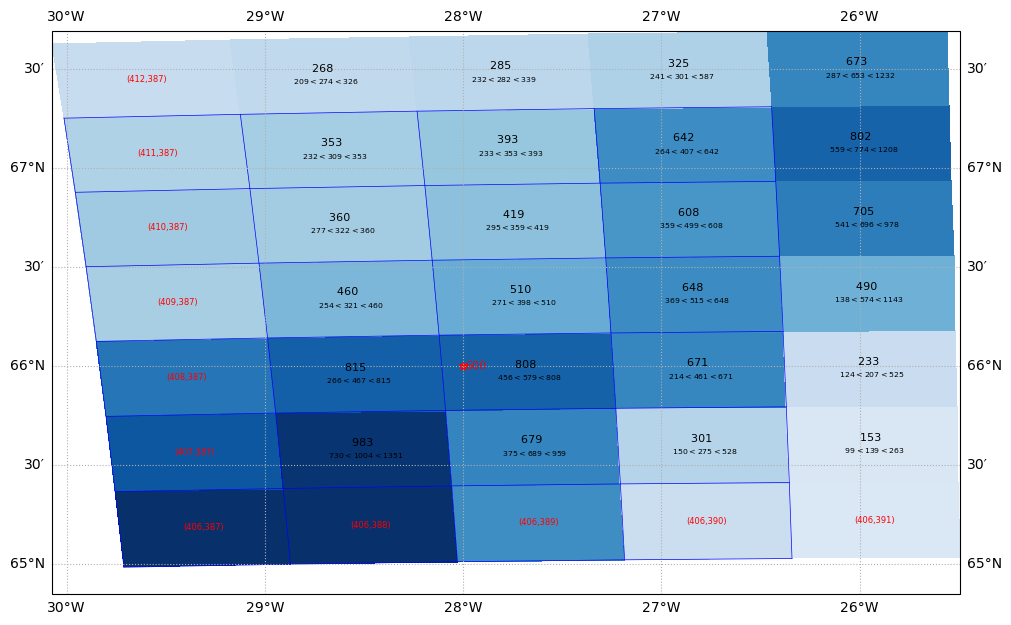

In [10]:
# use the cell maximum around the sill
for i in range(386,391):
    for j in range(408,412):
        if dss['mask'][j,i] != 0 :
            z = dss['D_max'][j,i]
            dss[depth_var_new][j,i] = z

            iEdit = np.concatenate((iEdit,(i,)))
            jEdit = np.concatenate((jEdit,(j,)))
            zEdit = np.concatenate((zEdit,(z,)))        

        
ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])


### Faroe Bank Channel

{'lat': 61.5, 'lon': -8.5, 'depth': 800.0, 'width': 15.0}


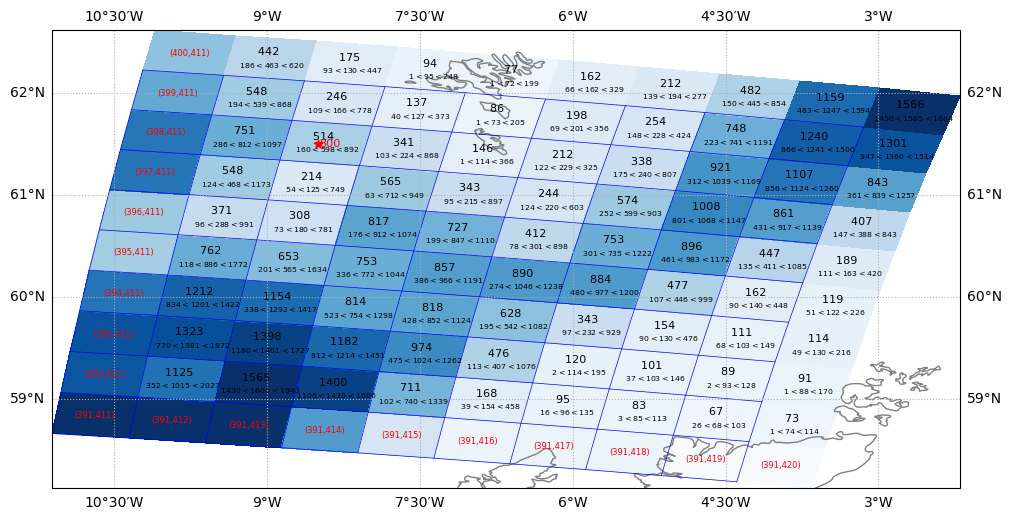

In [11]:
place='Faroe Bank Channel'
print(soc_table[place])
lon_beg = -11
lon_end = -2
lat_beg = 59.
lat_end = 62
zmax = 1500.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])


10


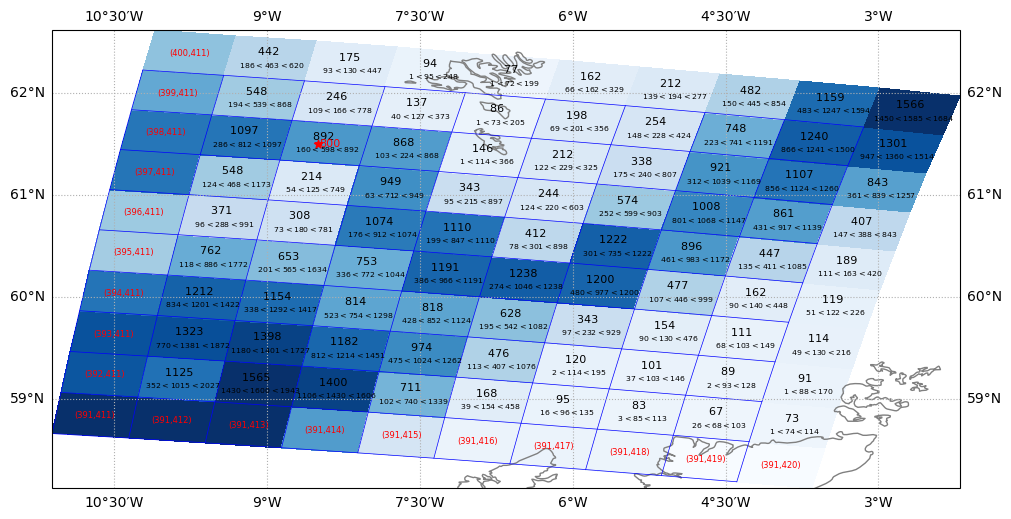

In [12]:
i = np.array([417,417,416,415,415,414,414,414,413,412,],np.int32)
j = np.array([396,395,395,395,396,396,397,398,398,398,],np.int32)
n = np.shape(j)[0]
print(n)
for n in range(n) :
    dss[depth_var_new][j[n],i[n]] = dss['D_max'][j[n],i[n]]
    iEdit = np.concatenate((iEdit,(i[n],)))
    jEdit = np.concatenate((jEdit,(j[n],)))
    zEdit = np.concatenate((zEdit,(dss['D_max'][j[n],i[n]],)))
    
ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])


### Strait of Gibralter

{'lat': 35.92, 'lon': -5.75, 'depth': 284.0, 'width': 10.0}


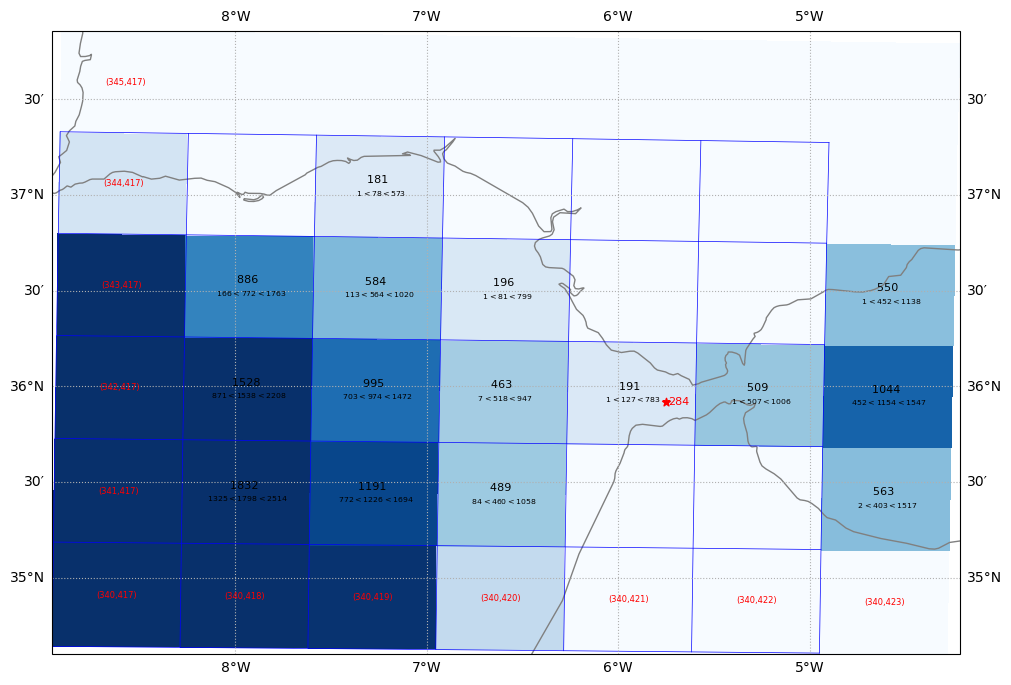

In [12]:
place = 'St. of Gibralter'
print(soc_table[place])
lon_beg = -8.5
lon_end = -4
lat_beg = 35
lat_end = 38
zmax = 1300.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

2


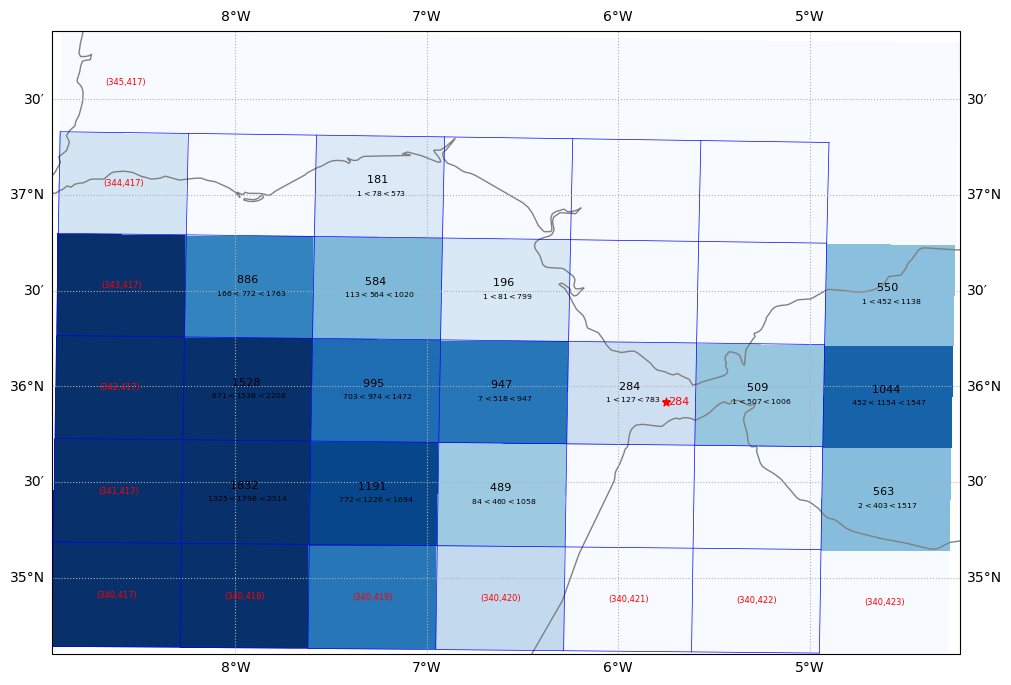

In [14]:
i = np.array([421,420],np.int32)
j = np.array([342,342],np.int32)
z = np.array([284,947],float)
n = np.shape(z)[0]
print(n)
for n in range(n) :
    dss[depth_var_new][j[n],i[n]] = z[n]

ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

iEdit = np.concatenate((iEdit,i))
jEdit = np.concatenate((jEdit,j))
zEdit = np.concatenate((zEdit,z))

### Florida Strait

{'lat': 24.25, 'lon': -80.5, 'depth': 800.0, 'width': 60.0}


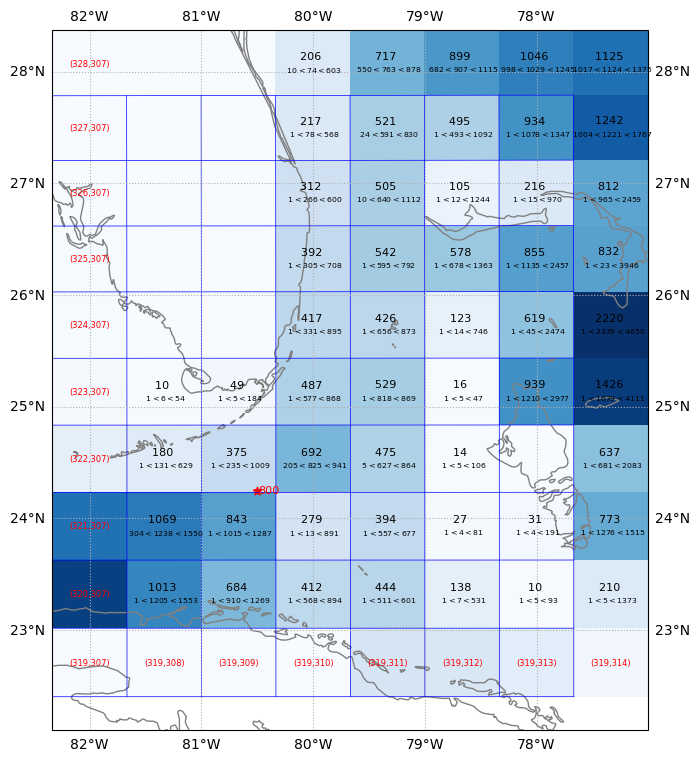

In [13]:
place = 'Florida St.'
print(soc_table[place])
lon_beg = -82
lon_end = -77
lat_beg = 23.
lat_end = 28.5
zmax = 1500.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

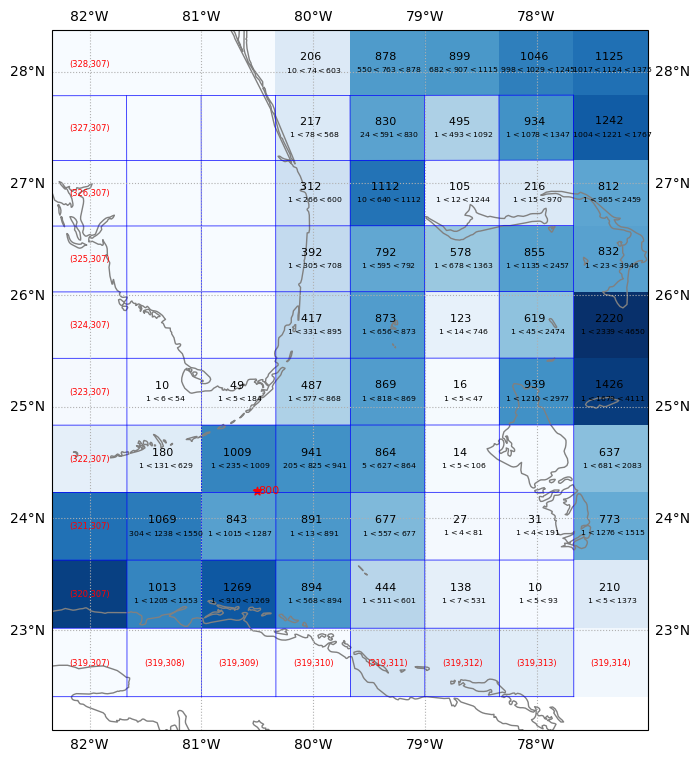

In [14]:
i = np.array([309,309,310,310,310,311,311,311,311,311,311,311,311],np.int32)
j = np.array([320,322,320,321,322,322,321,323,324,325,326,327,328],np.int32)
n = np.shape(j)[0]
for n in range(n) :
    dss[depth_var_new][j[n],i[n]] = dss['D_max'][j[n],i[n]]
    iEdit = np.concatenate((iEdit,(i[n],)))
    jEdit = np.concatenate((jEdit,(j[n],)))
    zEdit = np.concatenate((zEdit,(dss['D_max'][j[n],i[n]],)))
    
ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])


### Windward Passage

{'lat': 19.0, 'lon': -74.0, 'depth': 1650.0, 'width': 22.0}


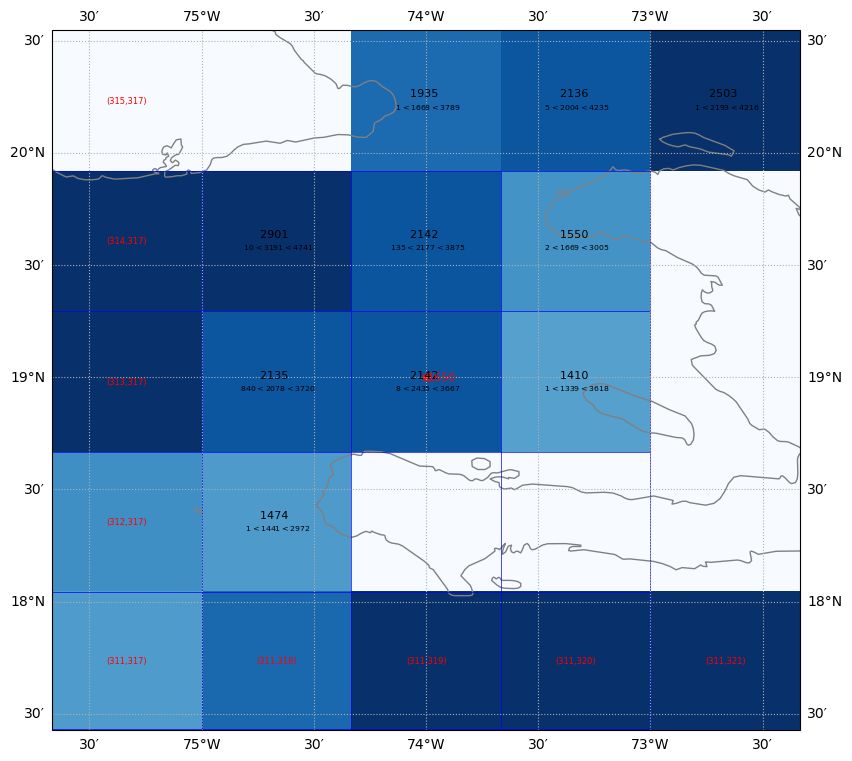

In [15]:
place = 'Windward Passage'
print(soc_table[place])
lon_beg = -75.5
lon_end = -72
lat_beg = 18
lat_end = 21
zmax = 2500.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

2


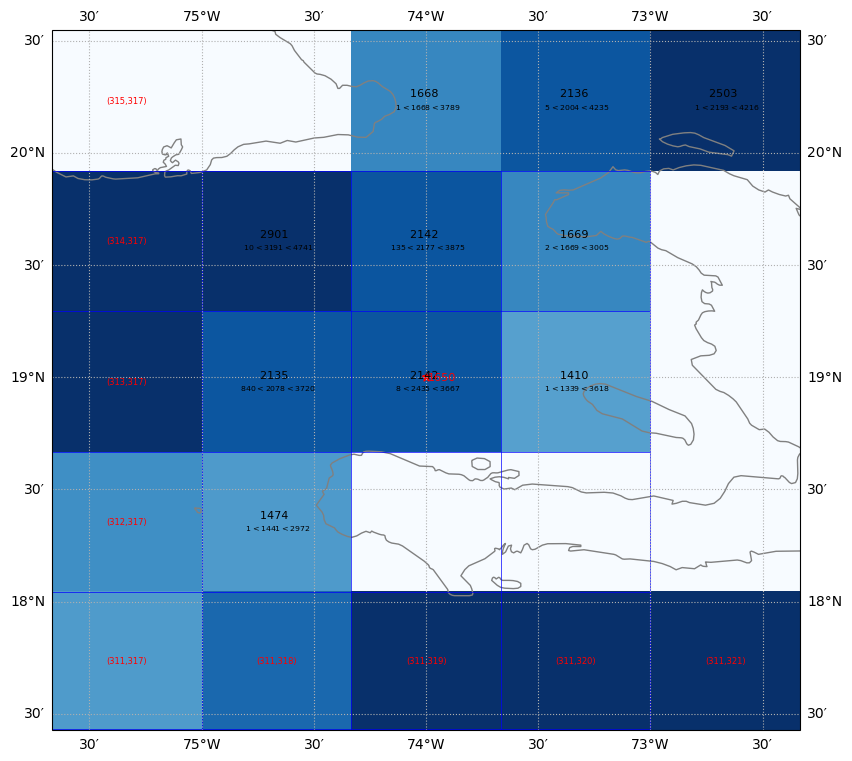

In [16]:
i = np.array([319,320,],np.int32)
j = np.array([315,314,],np.int32)
z = np.array([1650,],float)
n = np.shape(j)[0]
print(n)
for n in range(n) :
    z = dss['D_median'][j[n],i[n]]
    dss[depth_var_new][j[n],i[n]] = z
    iEdit = np.concatenate((iEdit,(i[n],)))
    jEdit = np.concatenate((jEdit,(j[n],)))
    zEdit = np.concatenate((zEdit,(z,)))
    
ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])


### Anegada Passage

{'lat': 18.4, 'lon': -64.2, 'depth': 1800.0, 'width': 15.0}


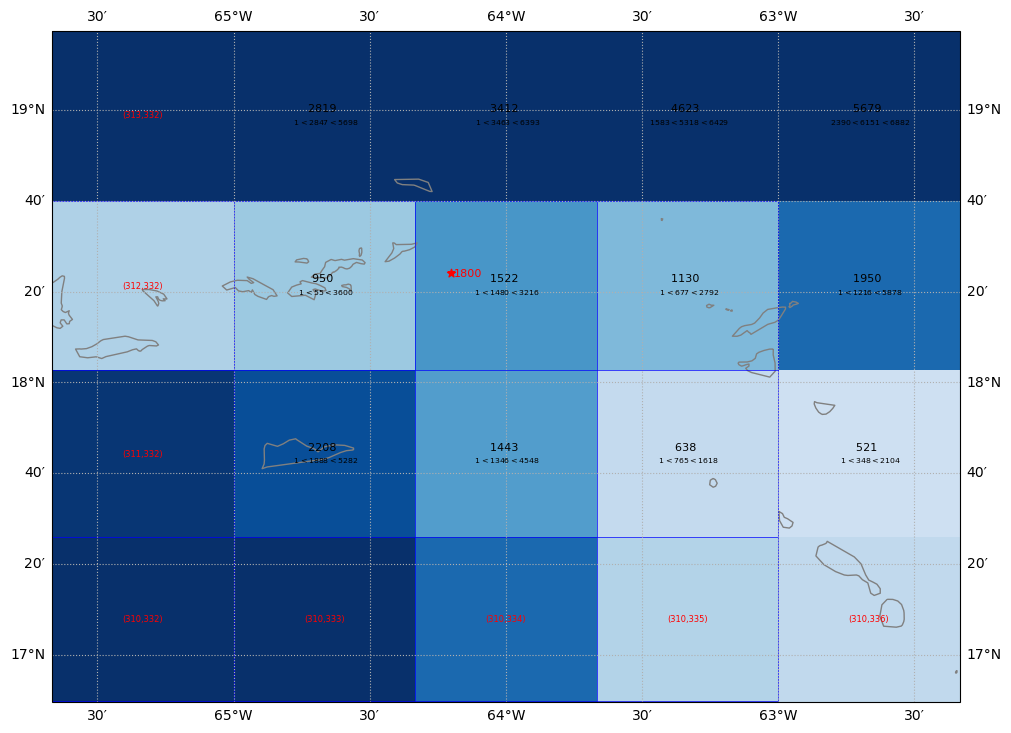

In [17]:
place = 'Anegada Passage'
print(soc_table[place])
lon_beg = -65.5
lon_end = -62.
lat_beg = 17
lat_end = 19.5
zmax = 2500.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

2


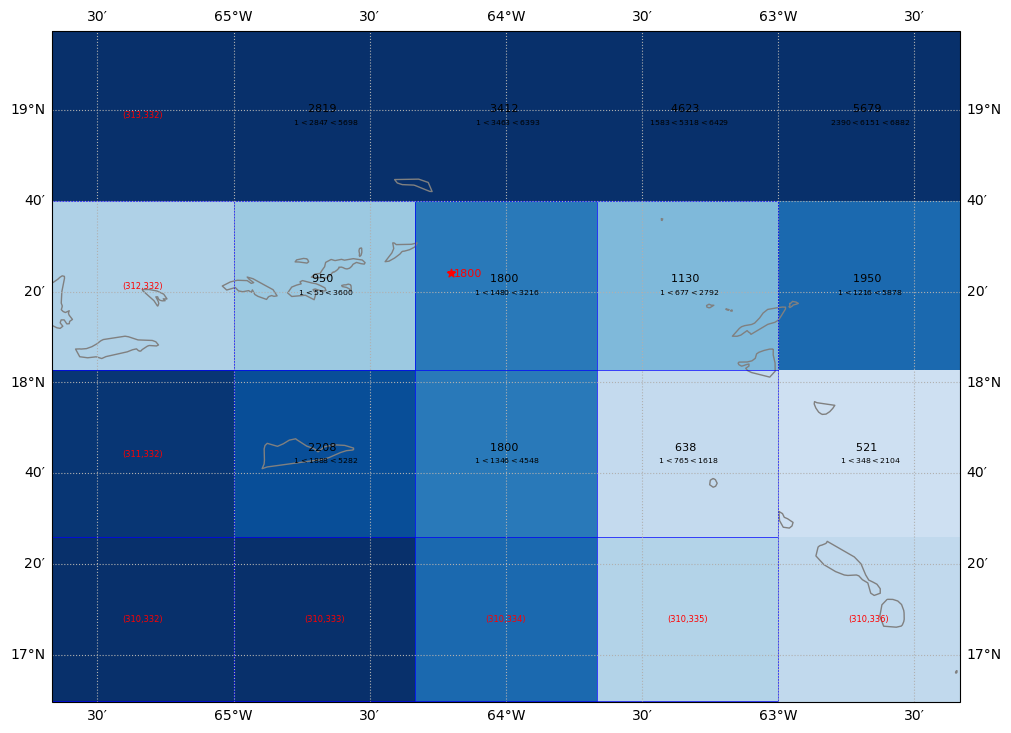

In [18]:
i = np.array([334,334,],np.int32)
j = np.array([311,312,],np.int32)
z = np.array([1800,1800,],float)
n = np.shape(j)[0]
print(n)
for n in range(n) :
    dss[depth_var_new][j[n],i[n]] = z[n]
    
ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

        
iEdit = np.concatenate((iEdit,i))
jEdit = np.concatenate((jEdit,j))
zEdit = np.concatenate((zEdit,z))

### Bosphorus

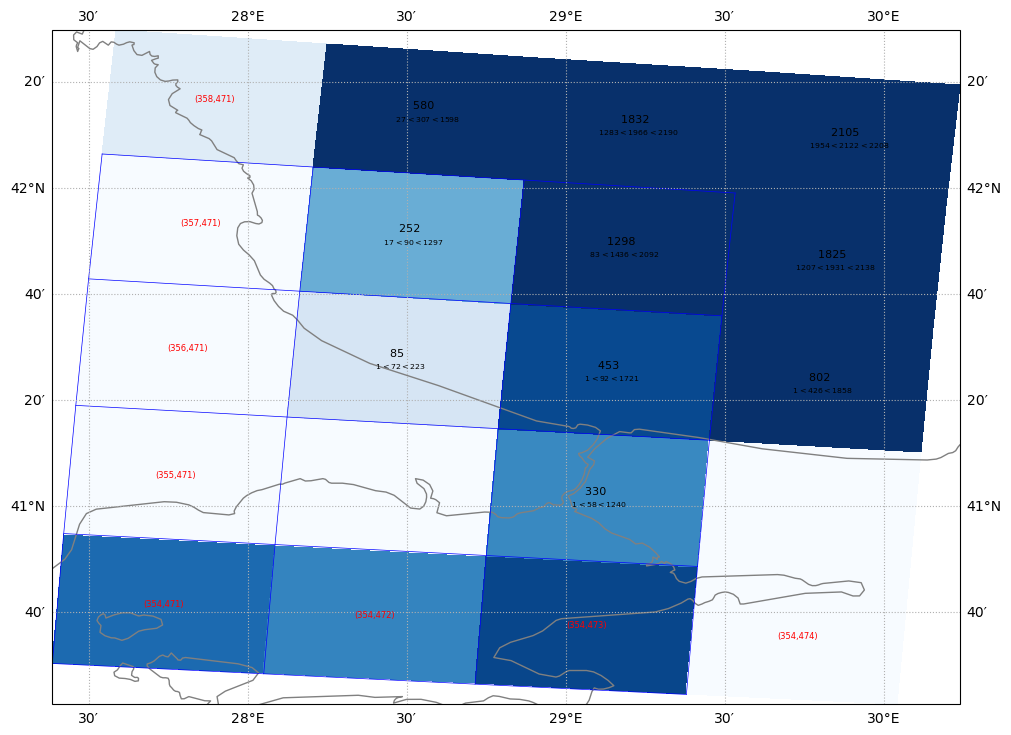

In [21]:
## Black Sea / Bosphorus
lon_beg = 28
lon_end = 30.5
lat_beg = 40.5
lat_end = 42.5
zmax = 500.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax)

1


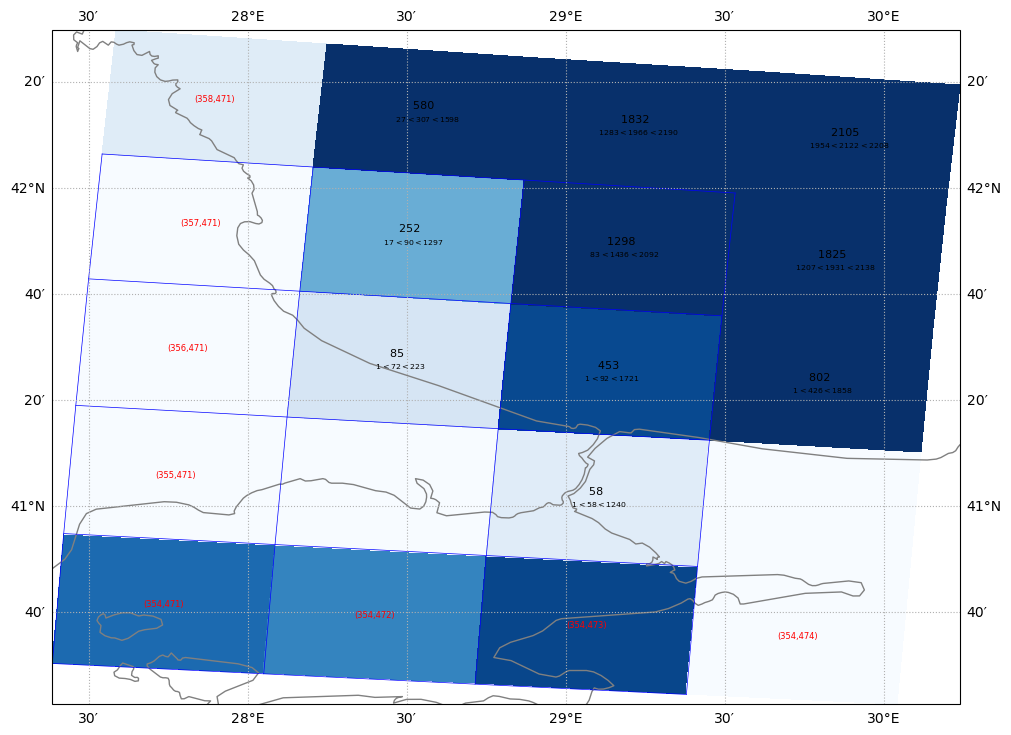

In [22]:
i = np.array([473,],np.int32)
j = np.array([355,],np.int32)
z = np.array([37.],float)
n = np.shape(j)[0]
print(n)

for n in range(n) :
    z = dss['D_median'][j[n],i[n]]
    dss[depth_var_new][j[n],i[n]] = z
    iEdit = np.concatenate((iEdit,(i[n],)))
    jEdit = np.concatenate((jEdit,(j[n],)))
    zEdit = np.concatenate((zEdit,(z,)))
    
ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax)


### Dardanelles

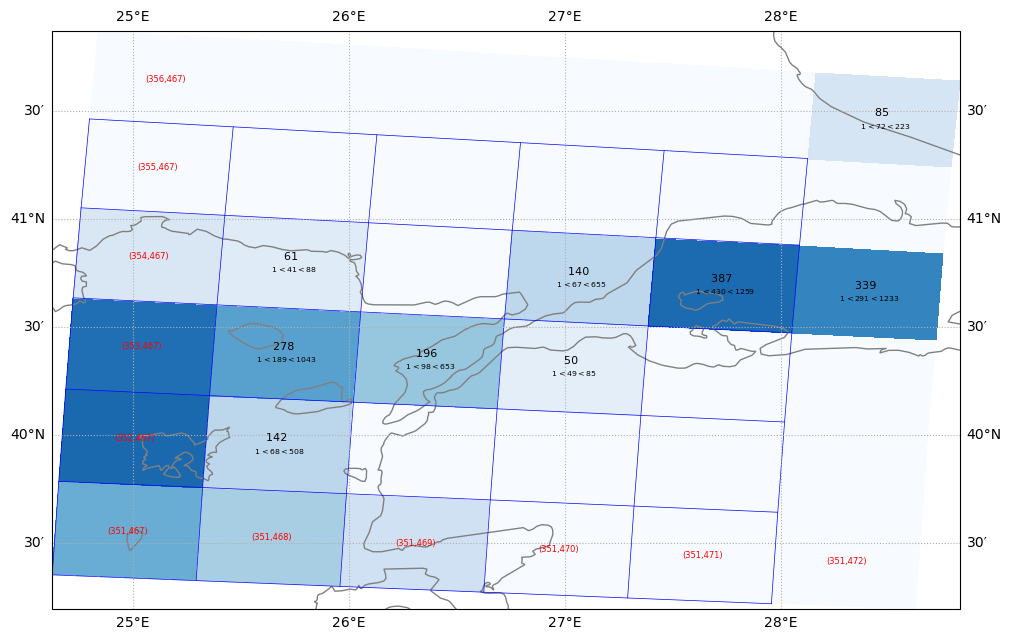

In [23]:
## Black Sea / Dardannelles
lon_beg = 25
lon_end = 29
lat_beg = 39.5
lat_end = 42
zmax = 500.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax)


2


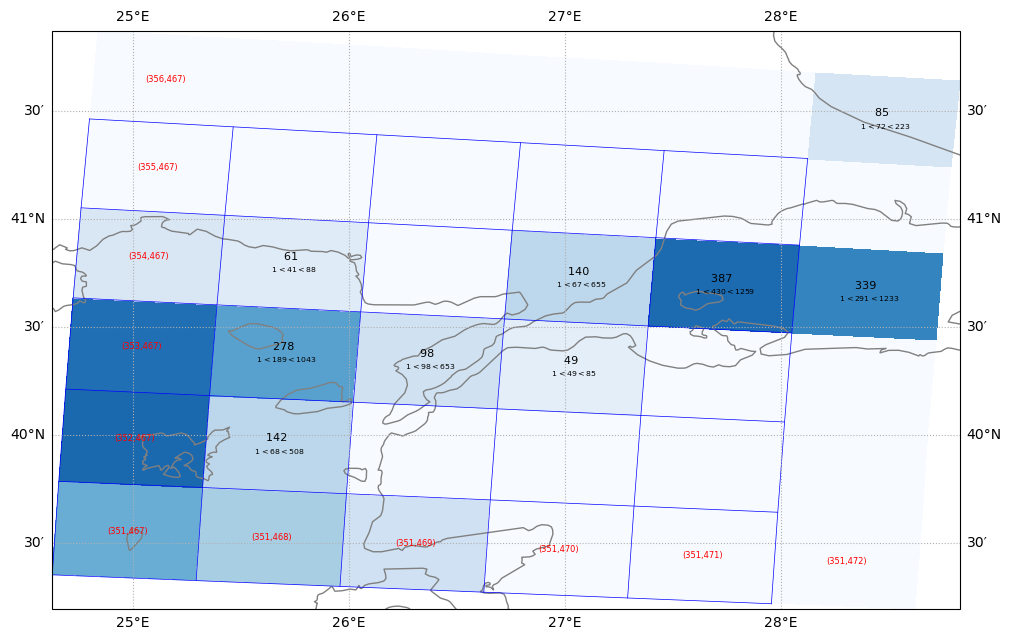

In [24]:
i = np.array([469,470,],np.int32)
j = np.array([353,353,],np.int32)
n = np.shape(j)[0]
print(n)
for n in range(n) :
    z = dss['D_median'][j[n],i[n]]
    dss[depth_var_new][j[n],i[n]] = z
    iEdit = np.concatenate((iEdit,(i[n],)))
    jEdit = np.concatenate((jEdit,(j[n],)))
    zEdit = np.concatenate((zEdit,(z,)))
    
ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax)


### Lombok Strait

{'lat': -8.9, 'lon': 116.0, 'depth': 350.0, 'width': 22.0}


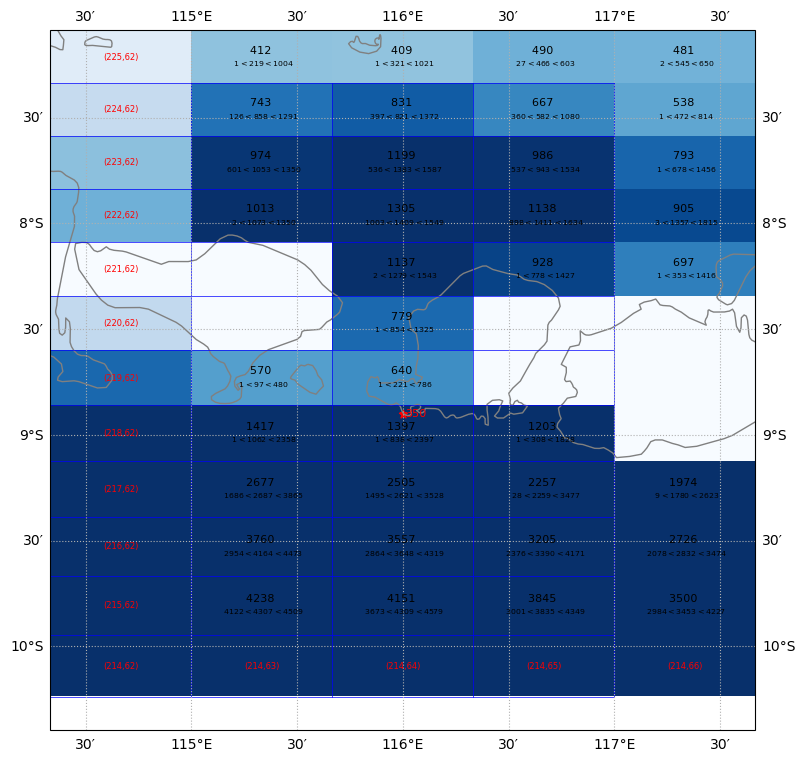

In [19]:
place = 'Lombok St.'
print(soc_table[place])
lon_beg = -245.5
lon_end = -242.
lat_beg = -10
lat_end = -7.
zmax = 1000.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

1


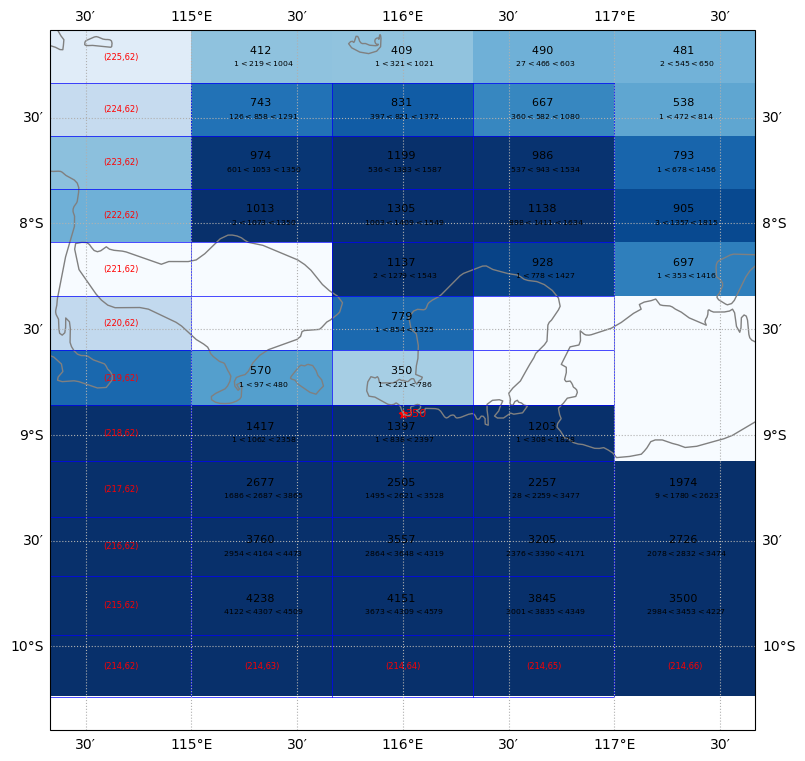

In [20]:
i = np.array([64,],np.int32)
j = np.array([219,],np.int32)
z = np.array([350,],float)
n = np.shape(j)[0]
print(n)
for n in range(n) :
    dss[depth_var_new][j[n],i[n]] = z[n]
    
ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

        
iEdit = np.concatenate((iEdit,i))
jEdit = np.concatenate((jEdit,j))
zEdit = np.concatenate((zEdit,z))

### Bab El-Mandeb

{'lat': 13.73, 'lon': 42.5, 'depth': 137.0, 'width': 32.0}


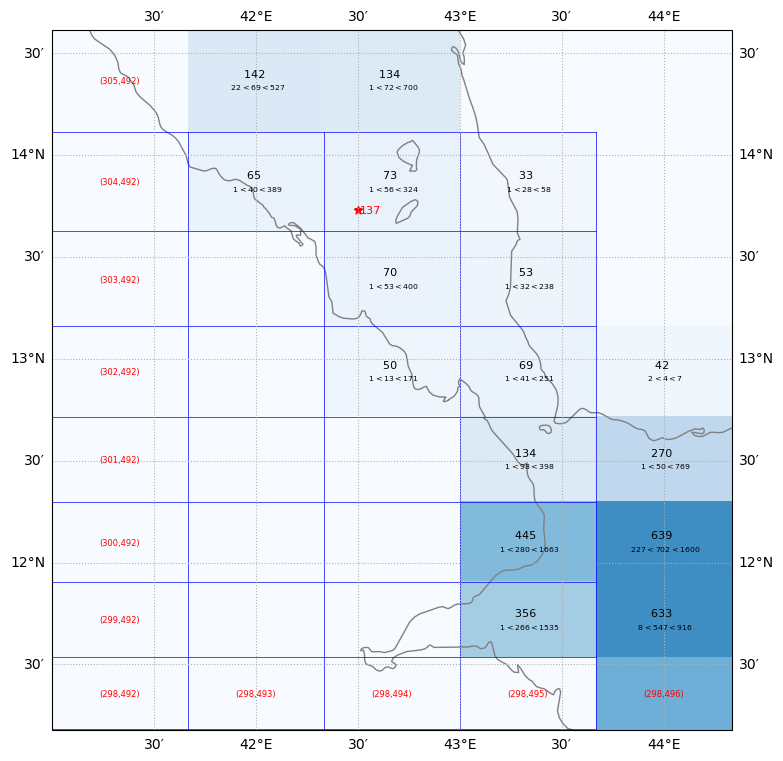

In [21]:
place = 'Bab El-Mandeb'
print(soc_table[place])
lon_beg = 41.5
lon_end = 44.5
lat_beg = 11.5
lat_end = 14.75
zmax = 1000.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

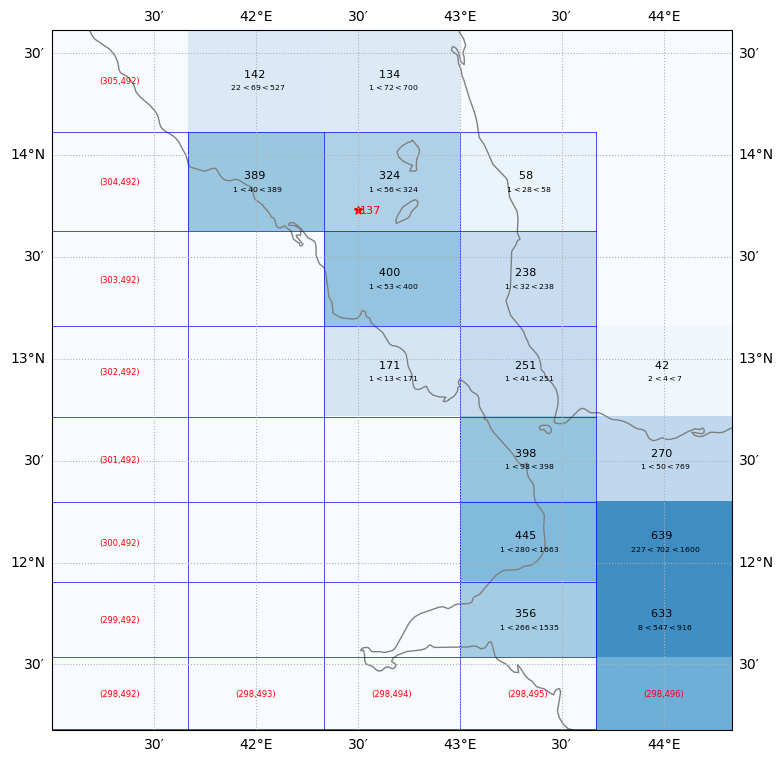

In [22]:

for i in range(493,496):
    for j in range(301,305):
        if dss['mask'][j,i] != 0 :
            z = dss['D_max'][j,i]
            dss[depth_var_new][j,i] = z

            iEdit = np.concatenate((iEdit,(i,)))
            jEdit = np.concatenate((jEdit,(j,)))
            zEdit = np.concatenate((zEdit,(z,)))        

        
ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])



### Bering St.

{'lat': 64.25, 'lon': -171.6, 'depth': 50.0, 'width': 85.0}


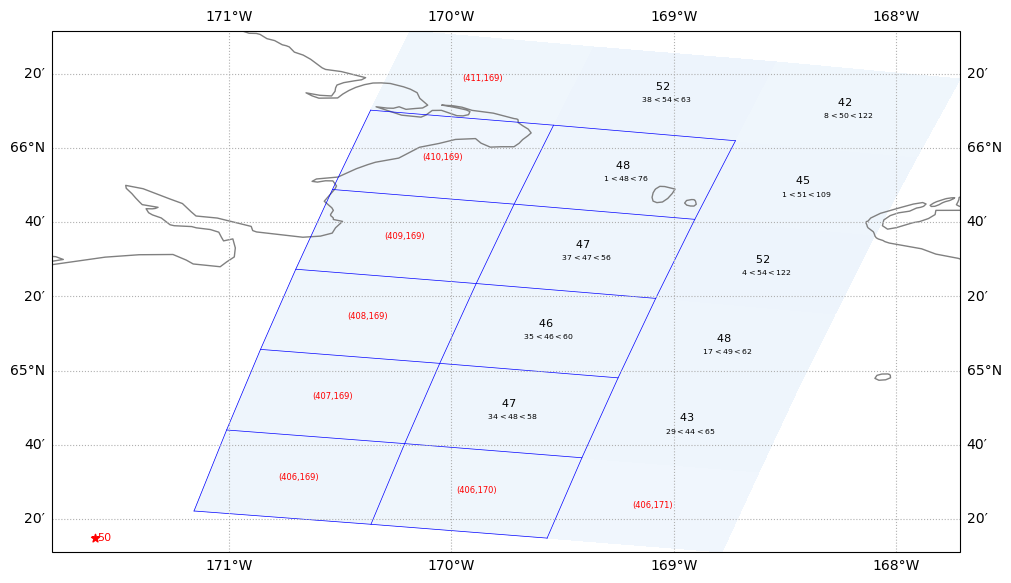

In [23]:
place = 'Bering St.'
print(soc_table[place])
lon_beg = -171
lon_end = -167
lat_beg = 64.5
lat_end = 66.5
zmax = 1000.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

## Create output dataset

In [24]:
iEdit

array([386., 386., 386., 386., 387., 387., 387., 387., 388., 388., 388.,
       388., 389., 389., 389., 389., 390., 390., 390., 390., 417., 417.,
       416., 415., 415., 414., 414., 414., 413., 412., 309., 309., 310.,
       310., 310., 311., 311., 311., 311., 311., 311., 311., 311., 319.,
       320., 334., 334.,  64., 493., 494., 494., 494., 495., 495., 495.,
       495.])

In [25]:
nlong = np.int32(np.shape(dss[depth_var_new])[0])
nlatg = np.int32(np.shape(dss[depth_var_new])[1])
print(nlong,nlatg)

nEdits = np.shape(zEdit)
ds_out = xr.Dataset(
 {'iEdit': (['nEdits'], iEdit.astype('int32'), {'long_name' : "i-index of edited depth"}),
  'jEdit': (['nEdits'], jEdit.astype('int32'), {'long_name' : "j-index of edited depth"}),
  'zEdit': (['nEdits'], zEdit, {'long_name' : "New value of depth", 'units' : 'meters'}),
  'ni' : nlong, 
  'nj' : nlatg,
 }
  )
ds_out.attrs['title'] = 'Topography Edits'
ds_out.attrs['original grid'] = file_in
ds_out['ni'].assign_attrs({'long_name' : "The size of the i-dimension of the dataset these edits apply to"})
ds_out['nj'].assign_attrs({'long_name' : "The size of the j-dimension of the dataset these edits apply to"})

ss = 'Date Created ' + today.strftime("%m/%d/%Y")
print(ss)
ds_out.attrs['Edit History'] = ss
ds_out

480 540
Date Created 02/18/2024


<xarray.Dataset>
Dimensions:  (nEdits: 56)
Dimensions without coordinates: nEdits
Data variables:
    iEdit    (nEdits) int32 386 386 386 386 387 387 ... 494 494 495 495 495 495
    jEdit    (nEdits) int32 408 409 410 411 408 409 ... 303 304 301 302 303 304
    zEdit    (nEdits) float64 522.5 515.0 512.5 658.7 ... 251.2 238.5 57.78
    ni       int32 480
    nj       int32 540
Attributes:
    title:          Topography Edits
    original grid:  topo.sub150.tx2_3v2.srtm.edit4.SmL1.0_C1.0.nc
    Edit History:   Date Created 02/18/2024

In [26]:
ds_out.to_netcdf(path_out+file_out_topo,unlimited_dims='nEdits')

/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'allowed-failures' has been deprecated; please use 'distributed.scheduler.allowed-failures' instead
  warnings.warn(
